### Exploratory data analysis

There are 5 parts in this notebook. 
For each analysis, we provide some examples for you to follow. Your task is to conduct your own analysis following the logics provided in the examples, maked as "Your task".

- **Part-1: Data overview**
    > check the #samples, #attributes <br>
    > attribute types <br>

- **Part-2: Data transformation**
    > transform text data: tokenization, stemming, and lemmatization <br>

- **Part-3: Feature engineering**
    > text feature representation <br>

- **Part-4: Brief Summary**


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data overview

* Link of my dataset: https://www.kaggle.com/datasets/infamouscoder/depression-reddit-cleaned *

In [117]:
# read data from file to a pandas dataframe
path = '/Users/pro/Desktop/Winter 2024/30100/30100_Yunrui/Reddit_depression.csv'
df = pd.read_csv(path) 

In [118]:
# check the shape of the data frame
print(df.shape)

(7731, 2)


In [119]:
# get an overview of the top-n rows/samples
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [120]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [121]:
# this dataset has been cleaned, so there is no missing value
null_sum = df.isnull().sum()
null_sum

clean_text       0
is_depression    0
dtype: int64

In [122]:
# check the data type of each column
# find out the clean_text is not string type, but we need string for text analysis
df.dtypes 

clean_text       object
is_depression     int64
dtype: object

In [123]:
# convert clean_text to string type
df['clean_text'] = df['clean_text'].astype('string')
df.dtypes

clean_text       string[python]
is_depression             int64
dtype: object

<Axes: xlabel='is_depression', ylabel='count'>

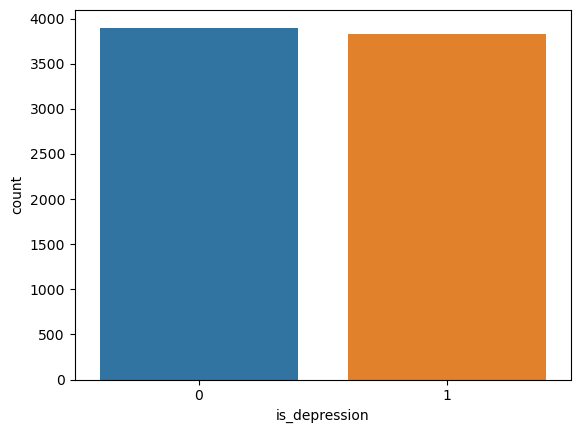

In [124]:
# this indicates that our dataset is pretty balanced
sns.countplot(data=df,x="is_depression")

#### Text transformation 
- tokenization, stemming, lemmatization

In [125]:
import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [126]:
# lower case all words
df['clean_text'] = df['clean_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [127]:
def remove_non_alphabetic(text):
    return ''.join(char if char.isalpha() or char.isspace() else '' for char in text)

In [128]:
# remove non alphabetic characters
# wwe also see that the sentence has been stemmed, we only need to lemmatize it
df['clean_text'] = df['clean_text'].apply(remove_non_alphabetic)
df['clean_text'][3]

'i ve kind of stuffed around a lot in my life delaying the inevitable of having to work a job and be a responsible adult and i m but the longest i ve ever held a job wa  month it wasn t that i m lazy i wa always doing other thing i enjoy but i know now unemployment ha caused most of my depression recently i just feel utterly hopeless when i think soon enough i ll have to move out on my own in some shitty house working a job i couldn t care le about to me it just seems like the perfect recipe to depression'

In [129]:
lemmatizer = WordNetLemmatizer()

In [130]:
# tokenize, lemmatize the text
text_lst = []
for i in df['clean_text']:
    tokens = word_tokenize(i)
    text = [lemmatizer.lemmatize(word) for word in tokens]
    text = " ".join(text)
    text_lst.append(text)

In [131]:
len(text_lst)

7731

#### Feature Engineering
- CountVectorizer
- TfidfVectorizer

*CountVectorizer*

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

In [176]:
vectorizer = CountVectorizer(min_df=10, max_df=0.8,ngram_range=(1,1),binary=False,stop_words='english',max_features=1000)
X = vectorizer.fit_transform(text_lst)

In [177]:
# check the feature matrix of the vectorized corpus
X.shape

(7731, 1000)

In [178]:
# check the extracted features during the vectorization
feature_names = vectorizer.get_feature_names_out()
feature_names

array(['able', 'absolutely', 'abuse', 'abusive', 'accept', 'accident',
       'account', 'act', 'action', 'actually', 'add', 'adhd', 'adult',
       'advice', 'affect', 'afford', 'afraid', 'age', 'ago', 'air',
       'alcohol', 'alive', 'allowed', 'alot', 'amazing', 'amp', 'anger',
       'angry', 'annoying', 'answer', 'antidepressant', 'anxiety',
       'anxious', 'anybody', 'anymore', 'anyways', 'apart', 'apartment',
       'apparently', 'appointment', 'appreciate', 'area', 'aren', 'arm',
       'ask', 'asked', 'asking', 'asleep', 'attack', 'attempt',
       'attempted', 'attention', 'avoid', 'awake', 'aware', 'away',
       'awful', 'awkward', 'baby', 'bad', 'badly', 'bar', 'barely',
       'basic', 'basically', 'bathroom', 'battle', 'bc', 'beat',
       'beautiful', 'bed', 'begin', 'beginning', 'believe', 'best',
       'better', 'big', 'biggest', 'bipolar', 'birthday', 'bit', 'black',
       'blame', 'blood', 'body', 'book', 'bored', 'boring', 'born', 'bos',
       'bother', 'boug

In [179]:
def get_topn_features(X, feature_names, topn=10):
    """
    Inputs:
        X: feature matrix
        feature_names: extracted features during vectorization
        topn: the number of most frequent features to return
    Outputs:
        topn most frequent features and their frequency
    """
    feature_ct = np.asarray(np.sum(X, axis=0)).reshape(-1)

    feature_freq = []
    
    for i in np.argsort(feature_ct)[::-1][:topn]:
        feature_freq.append({'feature':feature_names[i], 'frequency':feature_ct[i]})
    
    return pd.DataFrame(feature_freq)

In [180]:
get_topn_features(X, feature_names, topn=20)

,feature,frequency
0,just,4527
1,wa,3810
2,like,3584
3,feel,3227
4,don,3029
5,want,2292
6,know,2283
7,life,2147
8,ve,2096
9,time,2070


In [181]:
# vectorize the corpus in order to use it in the model later
matrix= vectorizer.fit_transform(text_lst).toarray() 

In [182]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,able,absolutely,abuse,abusive,accept,accident,account,act,action,actually,...,wrong,wrote,www,yeah,year,yes,yesterday,young,younger,zoloft
0,1,0,1,0,1,0,2,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7727,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


*TfidfVectorizer*

In [167]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [168]:
vectorizer2 = TfidfVectorizer(stop_words='english', ngram_range=(1, 1), min_df=10, max_df=0.8, max_features=1000)

In [169]:
X = vectorizer2.fit_transform(text_lst)
X.shape

(7731, 1000)

In [170]:
vectorizer2.get_feature_names_out()

array(['able', 'absolutely', 'abuse', 'abusive', 'accept', 'accident',
       'account', 'act', 'action', 'actually', 'add', 'adhd', 'adult',
       'advice', 'affect', 'afford', 'afraid', 'age', 'ago', 'air',
       'alcohol', 'alive', 'allowed', 'alot', 'amazing', 'amp', 'anger',
       'angry', 'annoying', 'answer', 'antidepressant', 'anxiety',
       'anxious', 'anybody', 'anymore', 'anyways', 'apart', 'apartment',
       'apparently', 'appointment', 'appreciate', 'area', 'aren', 'arm',
       'ask', 'asked', 'asking', 'asleep', 'attack', 'attempt',
       'attempted', 'attention', 'avoid', 'awake', 'aware', 'away',
       'awful', 'awkward', 'baby', 'bad', 'badly', 'bar', 'barely',
       'basic', 'basically', 'bathroom', 'battle', 'bc', 'beat',
       'beautiful', 'bed', 'begin', 'beginning', 'believe', 'best',
       'better', 'big', 'biggest', 'bipolar', 'birthday', 'bit', 'black',
       'blame', 'blood', 'body', 'book', 'bored', 'boring', 'born', 'bos',
       'bother', 'boug

In [171]:
pd.DataFrame(X.toarray(), columns=vectorizer2.get_feature_names_out())

,able,absolutely,abuse,abusive,accept,accident,account,act,action,actually,...,wrong,wrote,www,yeah,year,yes,yesterday,young,younger,zoloft
0,0.040282,0.0,0.054669,0.0,0.057276,0.0,0.114553,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.029501,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7726,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7727,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7728,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
7729,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [183]:
# vectorize the corpus in order to use it in the model later
matrix2= X.toarray()

#### Brief Summary 

- The dataset looks promising because the number of depression labeled text and the number of non-depression labeled text is balanced. Also, the dataset is relatively big (n=7730), we would be able to use it as a preliminary model and I also find another larger dataset that I can use later. 
- The top-20 featured words reveals that there might be some more fine-tuning work I can do to further remove or replace some words. However, I still need to read into it and discuss with TA and professor Wang because I don't know how to do it yet. Moreover, I only tried to create CountVectorizer and TfidVectorizer. I will further explore embedding next week if I have time to improve the furture performance of my model. 